# Implementations in Python using Jupyter Notebook

In [1]:
#Importing Required Modules or Libraries
from linear_classifier import LinearSVM , Softmax
from features import extract_features, process_arr
from BPN import TwoLayerNet
import numpy as np
import math
import time
import sys
import json
sys.path.insert(0,r'C:\Users\Engineer Singh\AppData\Local\Programs\Python\Python36\Lib\site-packages')
from mnist import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
#Load Training Data And Testing Data
try:
    del train_images, train_labels
    del test_images, test_labels
    print("cleared loaded data")
except:
    pass

mndata = MNIST("E:\\Programs\\Project to work Handwritten Digits Recognition\\Project data\\samples")
train_images, train_labels = mndata.load_training()
#print(mndata.display(images[0]))  #To display image
#print(labels[0])  #To display label of image

#Load Testing Data
test_images, test_labels = mndata.load_testing()
#print(mndata.display(test_images[0]))  #To display image
#print(test_labels[0])  #To display label of image

In [3]:
#convert Training And Testing Data into arrays
try:
    del X_train,y_train
    del X_test,y_test
    print('Clear previously loaded data.')
except:
    pass
X_train = np.array(train_images).astype(float)
y_train = np.array(train_labels)
X_test = np.array(test_images).astype(float)
y_test = np.array(test_labels)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (60000, 784)
Train labels shape:  (60000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


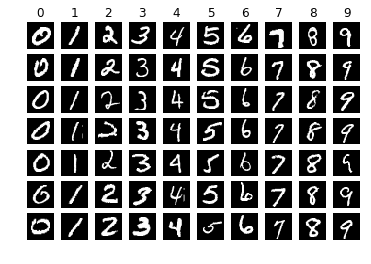

In [4]:
#Display Sample Trainig Data before preprocessing 
"""
by the way Trainig Data is already preprocessed but we again 
preprocess it so to extend this model to our own Testing data
"""
classes = [i for i in range(10)]
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

In [5]:
#Preprocessing of Image array
for i in range(len(X_train)):
    X_train[i] = process_arr(X_train[i])
for i in range(len(X_test)):
    X_test[i] = process_arr(X_test[i])

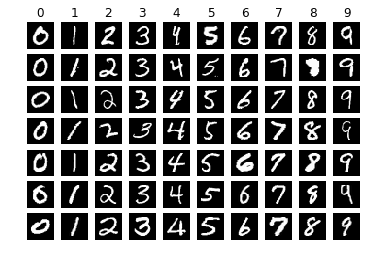

In [6]:
#Display Sample Trainig Data after preprocessing 
classes = [i for i in range(10)]
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

In [7]:
#Subsampling data
num_training = 50000
num_validation = 10000
num_test = 10000
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
    
# Normalize the data: subtract the mean image
#mean_image = np.mean(X_train, axis = 0)
#X_train -= mean_image
#X_val -= mean_image
#X_test -= mean_image
    
# add bias dimension and transform into columns (for softmax and SVM only)
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 785)
Train labels shape:  (50000,)
Validation data shape:  (10000, 785)
Validation labels shape:  (10000,)
Test data shape:  (10000, 785)
Test labels shape:  (10000,)


# Support Vector Machine Classifier Implementation

In [8]:
#Support Vector Machine Classifier
#Initialise SVM, learnng rate and regularization

lr  = 2.000000e-07 
reg = 2.000000e+04
svm = LinearSVM()

In [9]:
# Train the network
tic = time.time()
stats = svm.train(X_train, y_train,X_val, y_val, learning_rate=lr, reg= reg,
                      num_iters= 10000, verbose=True)
toc = time.time()
print('Training time {0}s'.format(toc - tic))
# performance on training set
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))

# performance on validation set 
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

# performance on test set
y_test_pred = svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('test set accuracy: %f' % test_accuracy)

iteration 0 / 10000: loss 175.664402
iteration 1000 / 10000: loss 2.350423
iteration 2000 / 10000: loss 1.758949
iteration 3000 / 10000: loss 2.154761
iteration 4000 / 10000: loss 2.227093
iteration 5000 / 10000: loss 1.713462
iteration 6000 / 10000: loss 1.936893
iteration 7000 / 10000: loss 1.896617
iteration 8000 / 10000: loss 2.076821
iteration 9000 / 10000: loss 1.909665
Training time 16.479116439819336s
training accuracy: 0.862300
validation accuracy: 0.876300
test set accuracy: 0.874300


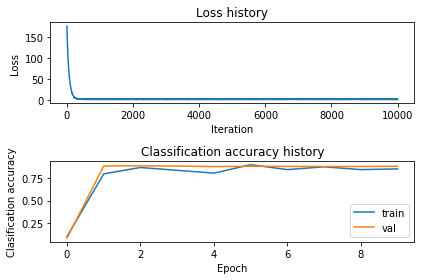

In [10]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(loc='best')
plt.tight_layout()

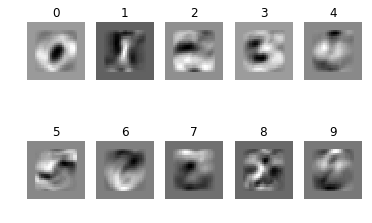

In [11]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = svm.W[:-1,:] # strip out the bias
w = w.reshape(28, 28, 1, 10)
w_min, w_max = np.min(w), np.max(w)
classes = [i for i in range(10)]
for i in range(10):
    plt.subplot(2, 5, i + 1)
      
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

# Softmax Classifier Implementation

In [12]:
#Softmax Classifier
#Initialise Softmax, learnng rate and regularization

lr = 1e-7
reg = 5e2
softmax = Softmax()

In [13]:
# Train the network
tic = time.time()
stats = softmax.train(X_train, y_train, X_val, y_val, learning_rate=lr,
                      reg=reg, num_iters= 10000,verbose=True)
toc = time.time()
print('Training Time {0}s'.format(toc - tic))
y_train_pred = softmax.predict(X_train)
acc_train = np.mean(y_train == y_train_pred)

y_val_pred = softmax.predict(X_val)
acc_val = np.mean(y_val == y_val_pred)
    
# Print out results.
train_accuracy, val_accuracy = acc_train, acc_val
print("train accuracy: ",train_accuracy)
print("val_accuracy: ",val_accuracy)
# evaluate on test set
y_test_pred = softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Test accuracy: ',test_accuracy)

iteration 0 / 10000: loss 8.371548
iteration 1000 / 10000: loss 4.260593
iteration 2000 / 10000: loss 3.323921
iteration 3000 / 10000: loss 3.048408
iteration 4000 / 10000: loss 2.463957
iteration 5000 / 10000: loss 2.207236
iteration 6000 / 10000: loss 1.921925
iteration 7000 / 10000: loss 1.790043
iteration 8000 / 10000: loss 1.663687
iteration 9000 / 10000: loss 1.659057
Training Time 16.675820350646973s
train accuracy:  0.86952
val_accuracy:  0.8876
Test accuracy:  0.8825


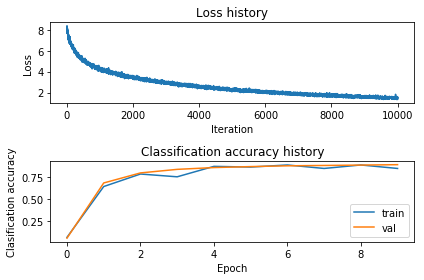

In [14]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(loc='best')
plt.tight_layout()

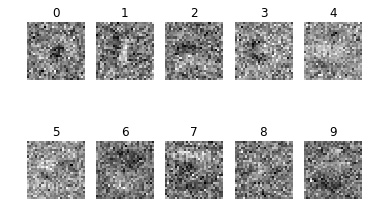

In [15]:
# Visualize the learned weights for each class
w = softmax.W[:-1,:] # strip out the bias
w = w.reshape(28, 28, 1, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

# BPN Implementation

In [16]:
# Initialise the network
input_size = 28 * 28 * 1
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

In [17]:
# strip out the Ones added for bias trick
X_trains = X_train[:,:-1]
X_vals  = X_val[:,:-1]
X_tests  = X_test[:,:-1]
print('Train data shape: ', X_trains.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_vals.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_tests.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [18]:
#Set pretrained parameters if available
with open('project_weights_BPN.json','r') as f:
    W1,b1,W2,b2 = json.load(f)
W1,b1 = np.array(W1).astype(float),np.array(b1).astype(float)
W2,b2 = np.array(W2).astype(float),np.array(b2).astype(float)

#Set pretrained parameters
net.set_params(W1,b1,W2,b2)

In [19]:
# Train the network
tic = time.time()
stats = net.train(X_trains, y_train, X_vals, y_val,
            num_iters=10000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)
toc = time.time()
print('Training time {0}s'.format(toc - tic))
# Predict on the validation set
val_acc = (net.predict(X_vals) == y_val).mean()
print('Validation accuracy: ', val_acc)
tr_acc = (net.predict(X_trains) == y_train).mean()
print('training accuracy: ', tr_acc)
test_acc = (net.predict(X_tests) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 10000: loss 0.471152
iteration 1000 / 10000: loss 0.279486
iteration 2000 / 10000: loss 0.234711
iteration 3000 / 10000: loss 0.261800
iteration 4000 / 10000: loss 0.234998
iteration 5000 / 10000: loss 0.203521
iteration 6000 / 10000: loss 0.232559
iteration 7000 / 10000: loss 0.214662
iteration 8000 / 10000: loss 0.248111
iteration 9000 / 10000: loss 0.245526
Training time 93.79263019561768s
Validation accuracy:  0.9678
training accuracy:  0.96982
Test accuracy:  0.966


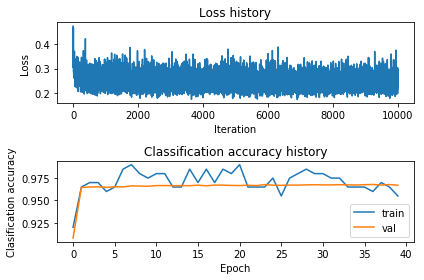

In [20]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(loc='best')
plt.tight_layout()

In [21]:
#testing our own data
input_image = "D://2.png"
output = []

l = extract_features(input_image)
for i in l:
    try:
        plt.imshow(i.astype('uint8'),cmap='gray')
        plt.show()
        print(i.shape)
        #i = i.reshape(-1).tolist()
        #append 1 for bias trick for svm and softmax
        #i.append(1)
        t = np.array(i)
        t = t.reshape(1,-1).astype(float)
        print(t.shape)
        t = net.predict(t)
        output.append(t[0])
        print('Label perdicted ->',t[0])
    except:
        pass

FileNotFoundError: [Errno 2] No such file or directory: 'D://2.png'

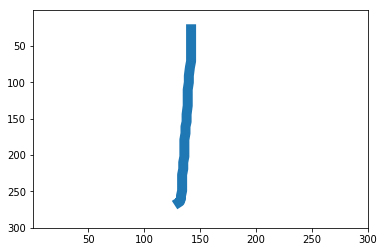

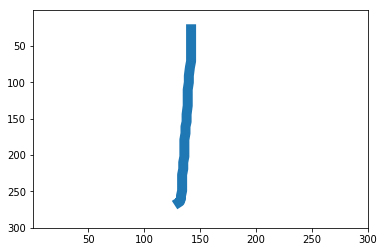

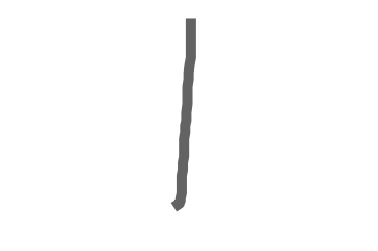

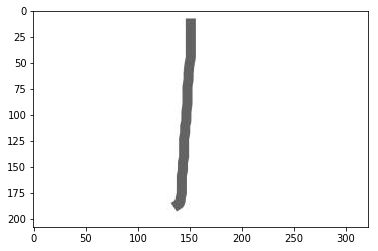

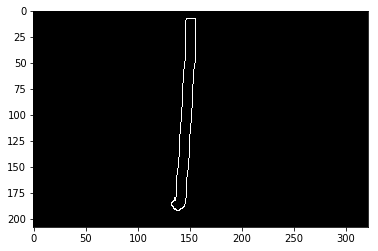

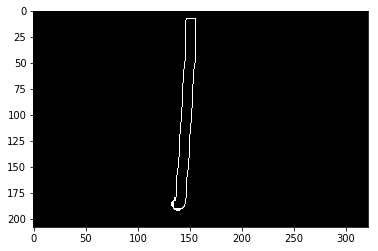

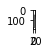

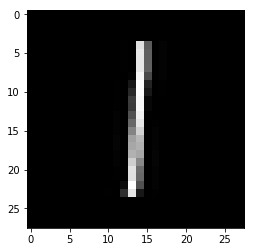

(1, 784)
Label perdicted -> 1


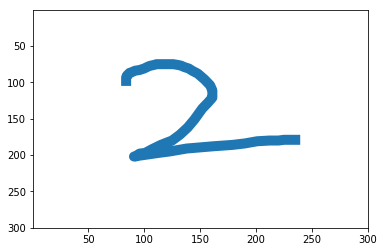

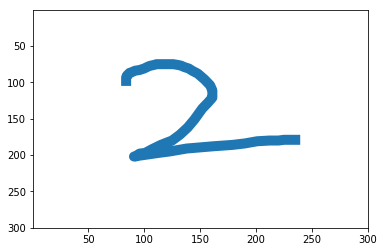

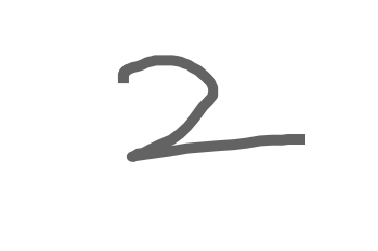

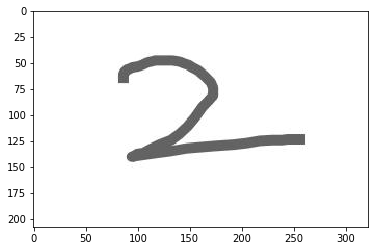

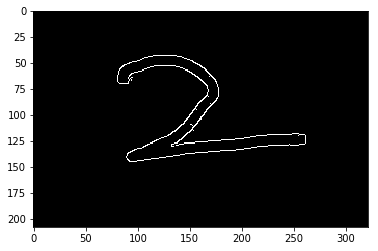

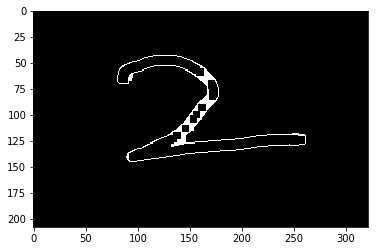

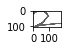

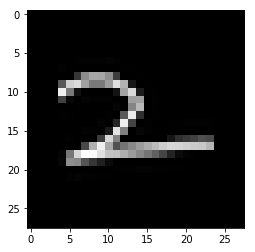

(1, 784)
Label perdicted -> 2


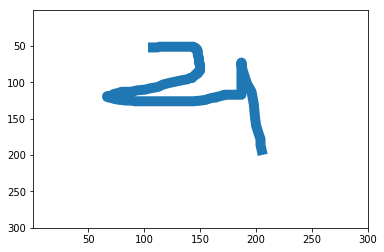

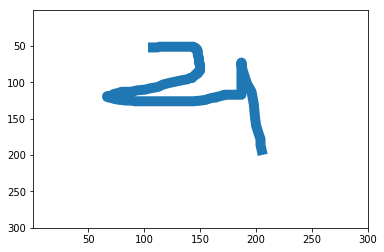

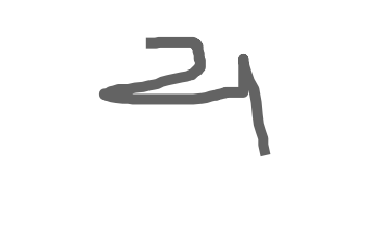

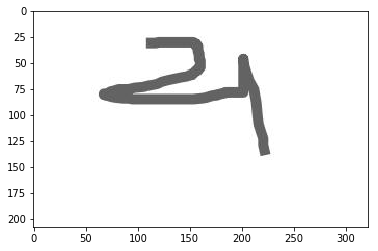

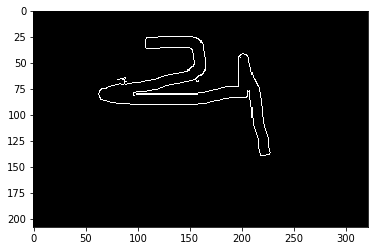

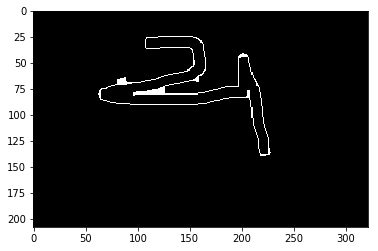

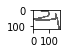

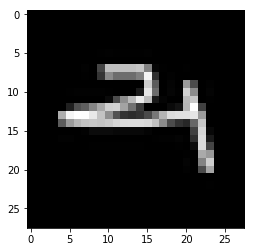

(1, 784)
Label perdicted -> 4


In [ ]:
from tkinter import Tk, Label, Entry, Button, Canvas, filedialog ,Menu, messagebox
import tkinter 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL.Image, PIL.ImageTk
from PIL import Image, ImageTk

class editor:
    def __init__(self):
        self.root = Tk()
        self.root.title("Handwritten Character Recognition")
        self.xx,self.yy = [],[]
        self.file = None
    def save_image(self,x,y):
        plt.ylim(300,1)
        plt.xlim(1,300)
        plt.plot(x,y,linewidth=10)
        plt.show()
        # make an agg figure
        fig, ax = plt.subplots()
        plt.ylim(300,1)
        plt.xlim(1,300)
        ax.plot(x,y,linewidth=10)
        fig.canvas.draw()
        # grab the pixel buffer and dump it into a numpy array
        X = np.array(fig.canvas.renderer._renderer)
        # now display the array X as an Axes in a new figure
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(111, frameon=False)
        im = Image.fromarray(X)
        im = im.convert('L')
        arr = np.asarray(im)
        arr2 = arr[40:-40,60:-50]
        im = Image.fromarray(arr2)
        plt.imshow(im)
        plt.axis('off')
        plt.grid(False)
        plt.show()
        im = Image.fromarray(arr2)
        im.save("imm.jpg")
    def motion(self,event):
        #print("Mouse position: (%s %s)" % (event.x, event.y))
        self.can.create_oval(event.x, event.y,event.x+14, event.y+14,fill = 'black',width=10)
        self.xx.append(event.x)
        self.yy.append(event.y)
    def getp(self):
        return self.xx,self.yy
    def resetp(self):
        self.xx,self.yy = [],[]
    def get_label(self):
        return 4
    def exit(self):
        res = messagebox.askyesno('Exit','Are you Sure')
        if res:
            self.root.destroy()
    def clear(self):
        self.can.delete("all")
        self.resetp()
        try:
            self.label.destroy()
            self.file = None
        except:pass
    def perdict(self):
        x,y = self.getp()
        if self.file == None and x[:] == []:
            res = messagebox.showerror('Error','Please Draw or Select an Image')
        else:
            if self.file != None:
                input_image = self.file
            else:
                self.save_image(x,y)
                input_image = 'imm.jpg'
            output = []
            l = extract_features(input_image)
            for i in l:
                try:
                    plt.imshow(i.astype('uint8'),cmap='gray')
                    plt.show()
                    t = np.array(i)
                    t = t.reshape(1,-1).astype(float)
                    print(t.shape)
                    t = net.predict(t)
                    output.append(t[0])
                    print('Label perdicted ->',t[0])
                except:
                    pass
            res = messagebox.showinfo('Label','Label Perdicted : '+str(output))
            self.resetp()
    def labels(self):
        self.lbl = Label(self.root, text="Draw Digit or Select an Image File", font=("Arial Bold", 10))
        self.lbl.grid(row=0)
        self.lbl2 = Label(self.root, text=" ", font=("Arial Bold", 10))
        self.lbl2.grid(row=4,column= 0)
    def menus(self):
        menu = Menu(self.root)
        new_item = Menu(menu,tearoff=0)
        new_item.add_command(label='Open File',command = self.open_file)
        menu.add_cascade(label='File', menu = new_item)
        self.root.config(menu=menu)
    def canvases(self):
        self.can = Canvas(self.root, width=300, height=300, bg="white")
        self.can.config(bg='white')
        self.can.bind('<B1-Motion>',self.motion)
        self.can.grid(row=1,column= 0)        
    def buttons(self):
        self.btn = Button(self.root, text="Exit", bg="orange", fg="red",command=self.exit)
        self.btn.grid(row=3,column= 0,sticky= 'E',padx=15,ipadx=10)
        self.btn = Button(self.root, text="Clear Canvas", bg="orange", fg="red",command=self.clear)
        self.btn.grid(row=3,column= 0,sticky= 'W',padx=15,ipadx=10)
        self.btn = Button(self.root, text="Perdict Label", bg="orange", fg="red",command=self.perdict)
        self.btn.grid(row=2,column= 0,sticky='S,N,E,W',padx=15,pady=15)
    def run(self):
        self.labels()
        self.menus()
        self.canvases()
        self.buttons()
        self.root.mainloop()
    def open_file(self):
        self.file = filedialog.askopenfilename(filetypes = (("jpg","*.jpg"),("all files","*.*")))
        if self.file:
            self.can.delete("all")
        images = Image.open(self.file)
        #images= images.resize((640, 480), PIL.Image.ANTIALIAS)
        img = ImageTk.PhotoImage(images)
        self.label = Label(self.root, image=img)
        self.label.img = img
        self.label.grid(column=0,row=1)
edit = editor()
edit.run()